  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for t

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       344
     Anomaly       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00       344
   macro avg       0.50      0.50      0.50       344
weighted avg       1.00      1.00      1.00       344



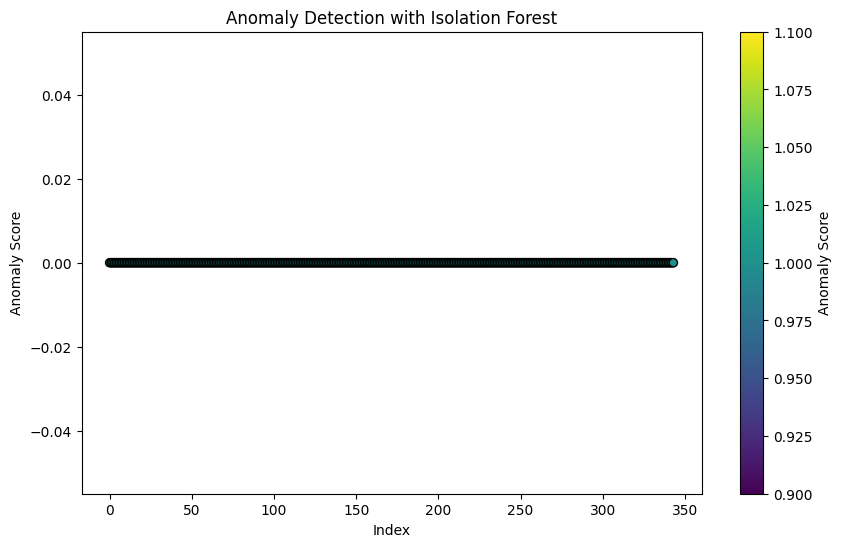

In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load dataset
df = sns.load_dataset('penguins')

# Display the first few rows of the dataset
print(df.head())

# Basic EDA
print(df.info())
print(df.describe())

# Feature engineering (if needed)
# For this example, we'll use categorical features for anomaly detection
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')

# Isolation Forest for Anomaly Detection
# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(df[['species', 'island']])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'contamination': [0.05, 0.1, 0.15]
}

grid_search = GridSearchCV(IsolationForest(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(df_encoded)

# Get the best model
best_model = grid_search.best_estimator_

# Predict outliers/anomalies
df['anomaly_score'] = best_model.predict(df_encoded)

# Classification report (evaluate model performance)
print(classification_report(np.ones(len(df)), df['anomaly_score'], labels=[1, -1], target_names=['Normal', 'Anomaly']))

# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, np.zeros(len(df)), c=df['anomaly_score'], cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(label='Anomaly Score')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.show()
